# Required libraries imported 

In [1]:
import tweepy as tw
import pandas as pd
from textblob import TextBlob
import sys,tweepy,csv,re
import matplotlib.pyplot as plot

# Access authentication for twitter

In [2]:
%run ./key.ipynb
auth = tw.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_secret)
api = tw.API(auth, wait_on_rate_limit=True)
print(api)

# Required functions defined

In [3]:
def cleantweeter(tweet):
        # Remove Links, Special Characters from extracted tweets
    return ' '.join(re.sub("([^0-9A-Za-z \t]) | (\w +:\ / \ / \S +) | (@[A-Za-z0-9]+)", " ", tweet).split())

    # function to calculate percentage
def percentage(arg1, arg2):
    temp = 100 * float(arg1) / float(arg2)
    return format(temp, '.2f')
  

def piechart( positive, wwpositive, sspositive, negative, wwnegative, ssnegative, neutral, search_Tweet, No_of_tweets):
    labels = ['Positive [' + str(positive) + '%]', 'Weakly Positive [' + str(wwpositive) + '%]','Strongly Positive [' + str(sspositive) + '%]', 'Neutral [' + str(neutral) + '%]',
                  'Negative [' + str(negative) + '%]', 'Weakly Negative [' + str(wwnegative) + '%]', 'Strongly Negative [' + str(ssnegative) + '%]']
    colors = ['#3a8207','#98eb34','#05ed85', '#faa700', '#f25757','#f25757','#fc0303']
    sizes = [positive, wwpositive, sspositive, neutral, negative, wwnegative, ssnegative]
    patches, texts = plot.pie(sizes, colors=colors, startangle=90,pctdistance=1)
    plot.legend(patches, labels, loc="best")
    plot.title('How people reacted on ' + search_Tweet + ' by analyzing ' + str(No_of_tweets) + '  Tweets.')
    plot.tight_layout()
    plot.axis('equal')
    plot.show()

# Extraction of data & using the data into application

Enter Keyword/Tag you wish to search : Apple Iphone
Enter how many tweets you wish to analyse: 500
How people reacted on Apple Iphone by analyzing 500 tweets.

General Report: 
Positive

Detailed Report: 
3.40% people had positive reaction
16% people had weakly positive reaction
34% people had strongly positive reaction
0.40% people had negative reaction
0% people had weakly negative reaction
6% people had strongly negative reaction
11.00% people had neutral reaction


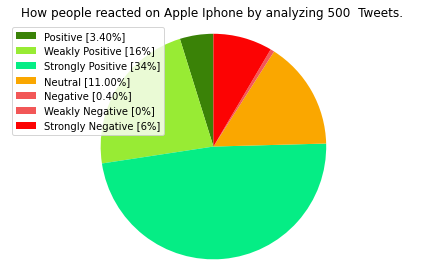

In [4]:
        #creating null variable to store text extracted from twitter    
        tweetText = []
        # input values taken from user to search the twwets
        search_Tweet = input("Enter Keyword/Tag you wish to search : ")
        No_of_tweets = int(input("Enter how many tweets you wish to analyse: "))

        # searching for tweets
        tweets = tw.Cursor(api.search, q=search_Tweet, lang = "en").items(No_of_tweets)

        # Open/create a file to save data
        csvFile = open('result.csv', 'a')

        # Use csv writer
        csvWriter = csv.writer(csvFile)


        # creating variable to store polarity values 
        polarity = 0
        positive = 0
        wwpositive = 0
        sspositive = 0
        negative = 0
        wwnegative = 0
        ssnegative = 0
        neutral = 0


        # iterating the tweets that are extracted
        for tweet in tweets:
           
            tweetText.append(cleantweeter(tweet.text).encode('utf-8'))
            # print (tweet.text.translate(non_bmp_map))    #print tweet's text
            analysis = TextBlob(tweet.text)
            # print(analysis.sentiment)  # print tweet's polarity
            polarity += analysis.sentiment.polarity  # adding up polarities to find the average later

            if (analysis.sentiment.polarity == 0):  # condition on reaction of how people are reacting. This will be required to find
                #average later
                neutral = neutral + 1
            elif (analysis.sentiment.polarity > 0 and analysis.sentiment.polarity <= 0.3):
                wwpositive += 1
            elif (analysis.sentiment.polarity > 0.3 and analysis.sentiment.polarity <= 0.6):
                positive = wwpositive + 1
            elif (analysis.sentiment.polarity > 0.6 and analysis.sentiment.polarity <= 1):
                sspositive = sspositive + 1
            elif (analysis.sentiment.polarity > -0.3 and analysis.sentiment.polarity <= 0):
                ssnegative = ssnegative + 1
            elif (analysis.sentiment.polarity > -0.6 and analysis.sentiment.polarity <= -0.3):
                negative = negative + 1
            elif (analysis.sentiment.polarity > -1 and analysis.sentiment.polarity <= -0.6):
                wwnegative = wwnegative + 1


        # Save the value in csv and close csv file
        csvWriter.writerow(tweetText)
        csvFile.close()

        # percentage calculated on how people reaction
        positive =percentage(positive, No_of_tweets)
        wpositive = percentage(wwpositive, No_of_tweets)
        spositive = percentage(sspositive, No_of_tweets)
        negative = percentage(negative, No_of_tweets)
        wnegative = percentage(wwnegative, No_of_tweets)
        snegative = percentage(ssnegative, No_of_tweets)
        neutral = percentage(neutral, No_of_tweets)

        # finding average on the polarity
        polarity = polarity / No_of_tweets

        # printing the data
        print("How people reacted on " + search_Tweet + " by analyzing " + str(No_of_tweets) + " tweets.")
        print()
        print("General Report: ")
        
        #condition on the polarity
        if (polarity == 0):
            print("Neutral")
        elif (polarity > 0 and polarity <= 0.3):
            print("Weakly Positive")
        elif (polarity > 0.3 and polarity <= 0.6):
            print("Positive")
        elif (polarity > 0.6 and polarity <= 1):
            print("Strongly Positive")
        elif (polarity > -0.3 and polarity <= 0):
            print("Weakly Negative")
        elif (polarity > -0.6 and polarity <= -0.3):
            print("Negative")
        elif (polarity > -1 and polarity <= -0.6):
            print("Strongly Negative")

        print()
        print("Detailed Report: ")
        print(str(positive) + "% people had positive reaction")
        print(str(wwpositive) + "% people had weakly positive reaction")
        print(str(sspositive) + "% people had strongly positive reaction")
        print(str(negative) + "% people had negative reaction")
        print(str(wwnegative) + "% people had weakly negative reaction")
        print(str(ssnegative) + "% people had strongly negative reaction")
        print(str(neutral) + "% people had neutral reaction")

        #function to print Pie-chart is called
        piechart(positive, wwpositive, sspositive, negative, wwnegative, ssnegative, neutral, search_Tweet, No_of_tweets)

        